# Plotting Results of Segmentation Experiments

This notebook is used to plot the graphs reported in this study.

In [23]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

from scipy.stats import ttest_rel

## Majority Vote Algorithm Variants for MULTICUE

In [1]:
def addlabels(rects, vals, ax):
    for rect, label in zip(rects, vals):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height - 4, round(label, 1), ha='center', va='bottom', rotation=90, fontsize=12)

def plot_weight_types(weight_scores, score_type, y_lim):
    labels = ['MULTICUE-14', 'MULTICUE-17', 'MULTICUE-21']

    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    rects = []
    for i, label in zip(list(range(4)), ["Accuracy", "Precision", "Recall", "F1-Score"]):
        rects.append(ax.bar(x + (i * 2 - 3) * width/2, np.mean(weight_scores[i], axis=1), width,
                    yerr=np.std(weight_scores[i],axis=1), label=label))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax.set_title('{} F1 scores by model and weight type'.format(score_type))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(y_lim)
    ax.legend(title="Weight type", loc="upper left", fontsize=12, title_fontsize=14)

    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=12)

    for i in range(4):
        addlabels(rects[i], np.mean(weight_scores[i], axis=1), ax)

    fig.tight_layout()

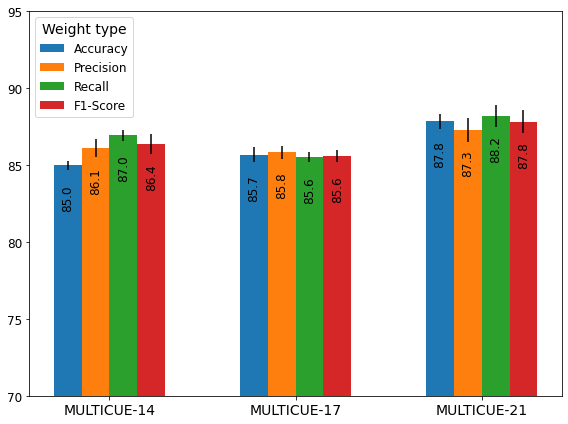

In [121]:
multi14_acc_boundary = [0.8472, 0.8503, 0.8521, 0.8468, 0.8444, 0.8511, 0.8486, 0.85, 0.8521, 0.8561]
multi14_prec_boundary = [0.8561, 0.8565, 0.8578, 0.8564, 0.8635, 0.8671, 0.8565, 0.872, 0.8583, 0.8681]
multi14_rec_boundary = [0.872, 0.8706, 0.8742, 0.8675, 0.8628, 0.8685, 0.868, 0.8658, 0.8747, 0.8719]
multi14_f1_boundary = [0.8577, 0.856, 0.86, 0.856, 0.865, 0.8668, 0.8725, 0.8723, 0.8607, 0.8715]

multi17_acc_boundary = [0.8535, 0.8516, 0.8603, 0.8606, 0.857, 0.8667, 0.8602, 0.8525, 0.8528, 0.8521]
multi17_prec_boundary = [0.8576, 0.8539, 0.8612, 0.8626, 0.8592, 0.8668, 0.8611, 0.8538, 0.8541, 0.8528]
multi17_rec_boundary = [0.854, 0.8521, 0.8579, 0.8574, 0.8574, 0.8619, 0.8581, 0.8522, 0.8519, 0.8523]
multi17_f1_boundary = [0.8553, 0.8527, 0.8582, 0.8587, 0.8577, 0.8629, 0.8585, 0.8527, 0.8509, 0.8509]

multi21_acc_boundary = [0.8736, 0.8766, 0.8825, 0.8826, 0.8726, 0.8737, 0.8827, 0.8715, 0.883, 0.8858]
multi21_prec_boundary = [0.8659, 0.875, 0.8608, 0.8791, 0.8786, 0.8824, 0.867, 0.8677, 0.8653, 0.8849]
multi21_rec_boundary = [0.8848, 0.8754, 0.8884, 0.8753, 0.8735, 0.8793, 0.8868, 0.8735, 0.8882, 0.8942]
multi21_f1_boundary = [0.8709, 0.8823, 0.8664, 0.8837, 0.8828, 0.8867, 0.8797, 0.8711, 0.8706, 0.8883]

acc_weights = [multi14_acc_boundary, multi17_acc_boundary, multi21_acc_boundary]
prec_weights = [multi14_prec_boundary, multi17_prec_boundary, multi21_prec_boundary]
rec_weights = [multi14_rec_boundary, multi17_rec_boundary, multi21_rec_boundary]
f1_weights = [multi14_f1_boundary, multi17_f1_boundary, multi21_f1_boundary]
weights = np.array([acc_weights, prec_weights, rec_weights, f1_weights])
weights = weights * 100

plot_weight_types(weights, "Boundary", [70,95])

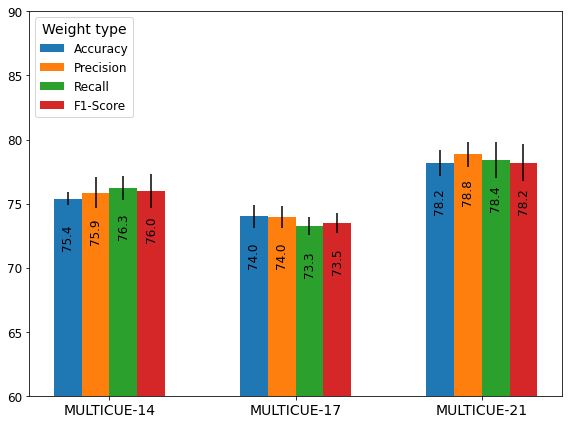

In [3]:
multi14_acc_word = [0.7519, 0.7529, 0.7584, 0.7492, 0.7462, 0.7542, 0.7528, 0.7528, 0.7558, 0.7653]
multi14_prec_word = [0.7488, 0.7476, 0.7543, 0.7484, 0.7639, 0.7682, 0.7487, 0.7796, 0.7496, 0.7767]
multi14_rec_word = [0.7652, 0.7664, 0.7725, 0.7535, 0.7465, 0.7606, 0.7698, 0.748, 0.7717, 0.7709]
multi14_f1_word = [0.7482, 0.7446, 0.7536, 0.7429, 0.7636, 0.7642, 0.7783, 0.7775, 0.7508, 0.7773]

multi17_acc_word = [0.7359, 0.729, 0.7458, 0.751, 0.7421, 0.7569, 0.744, 0.7325, 0.7319, 0.7303]
multi17_prec_word = [0.7384, 0.7298, 0.744, 0.7497, 0.7411, 0.7566, 0.7437, 0.731, 0.7322, 0.7297]
multi17_rec_word = [0.7293, 0.7241, 0.7358, 0.7379, 0.7362, 0.7467, 0.7369, 0.7261, 0.7259, 0.7262]
multi17_f1_word = [0.7339, 0.7265, 0.7381, 0.7423, 0.7374, 0.7496, 0.7387, 0.7286, 0.726, 0.7251]

multi21_acc_word = [0.7737, 0.7788, 0.7895, 0.7897, 0.7713, 0.7692, 0.7908, 0.7669, 0.7893, 0.797]
multi21_prec_word = [0.7764, 0.7886, 0.7945, 0.7955, 0.7767, 0.7914, 0.7951, 0.7701, 0.794, 0.8019]
multi21_rec_word =  [0.7913, 0.7702, 0.7964, 0.7709, 0.7688, 0.7764, 0.795, 0.7674, 0.7963, 0.8075]
multi21_f1_word = [0.7687, 0.7894, 0.7621, 0.7919, 0.7924, 0.7959, 0.7876, 0.7658, 0.765, 0.8015]

acc_weights = [multi14_acc_word, multi17_acc_word, multi21_acc_word]
prec_weights = [multi14_prec_word, multi17_prec_word, multi21_prec_word]
rec_weights = [multi14_rec_word, multi17_rec_word, multi21_rec_word]
f1_weights = [multi14_f1_word, multi17_f1_word, multi21_f1_word]
weights = np.array([acc_weights, prec_weights, rec_weights, f1_weights])
weights = weights * 100

plot_weight_types(weights, "Word", [60,90])

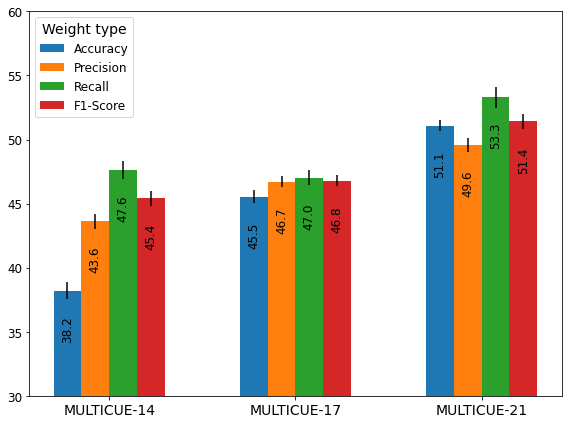

In [4]:
multi14_acc_lex = [0.3837, 0.3858, 0.3821, 0.3737, 0.3706, 0.3845, 0.3747, 0.3851, 0.3871, 0.3945]
multi14_prec_lex = [0.4419, 0.4421, 0.4254, 0.4389, 0.4303, 0.4363, 0.4294, 0.4345, 0.4435, 0.44]
multi14_rec_lex = [0.4699, 0.4712, 0.4782, 0.4893, 0.4638, 0.479, 0.4721, 0.4802, 0.4779, 0.4833]
multi14_f1_lex = [0.4586, 0.454, 0.4519, 0.4547, 0.4432, 0.4587, 0.4448, 0.4555, 0.4567, 0.4633]

multi17_acc_lex = [0.4467, 0.4537, 0.4606, 0.4515, 0.4583, 0.4645, 0.4587, 0.4518, 0.453, 0.4548]
multi17_prec_lex = [0.4656, 0.4674, 0.4722, 0.4622, 0.4694, 0.4748, 0.4693, 0.4639, 0.4647, 0.4612]
multi17_rec_lex = [0.4678, 0.4735, 0.4729, 0.4623, 0.4761, 0.4792, 0.4758, 0.4656, 0.4668, 0.4636]
multi17_f1_lex = [0.4672, 0.4748, 0.4696, 0.4624, 0.4715, 0.4737, 0.4708, 0.4627, 0.4653, 0.4615]

multi21_acc_lex = [0.5147, 0.5042, 0.517, 0.515, 0.508, 0.5116, 0.5044, 0.5134, 0.5072, 0.5119]
multi21_prec_lex =  [0.4984, 0.494, 0.4916, 0.4954, 0.489, 0.4973, 0.4915, 0.5014, 0.4919, 0.5069]
multi21_rec_lex = [0.5296, 0.5281, 0.5429, 0.5459, 0.5196, 0.5336, 0.5372, 0.5271, 0.5256, 0.539]
multi21_f1_lex = [0.5149, 0.5107, 0.5043, 0.5218, 0.5106, 0.5178, 0.5101, 0.52, 0.5088, 0.5218]

acc_weights = [multi14_acc_lex, multi17_acc_lex, multi21_acc_lex]
prec_weights = [multi14_prec_lex, multi17_prec_lex, multi21_prec_lex]
rec_weights = [multi14_rec_lex, multi17_rec_lex, multi21_rec_lex]
f1_weights = [multi14_f1_lex, multi17_f1_lex, multi21_f1_lex]
weights = np.array([acc_weights, prec_weights, rec_weights, f1_weights])
weights = 100 * weights

plot_weight_types(weights, "Lexicon", [30,60])

In [6]:
ttest_rel(multi21_rec_word, multi21_acc_word)

Ttest_relResult(statistic=0.733930082898599, pvalue=0.4816725735420573)

## Comparing MULTICUE to DYMULTI for different values of alpha

In [100]:
def addlabels(rects, vals, ax):
    for rect, label in zip(rects, vals):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height - 5, round(label, 1), ha='center', va='bottom', rotation=90, fontsize=12)

def plot_multicue_types(weight_scores, score_type, y_lim):
    labels = ['MULTICUE-14', 'MULTICUE-17', 'MULTICUE-21']

    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    rects = []
    for i, label in zip(list(range(4)), ["MULTICUE", "DYMULTI, alpha=0", "DYMULTI, alpha=0.5", "DYMULTI, alpha=1"]):
        rects.append(ax.bar(x + (i * 2 - 3) * width/2, np.mean(weight_scores[i], axis=1), width,
                    yerr=np.std(weight_scores[i],axis=1), label=label))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Set of Indicators', fontsize=16)
    #ax.set_title('{} F1 scores by model and weight type'.format(score_type))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(y_lim)
    ax.legend(title="Model", loc="upper left", title_fontsize=14, fontsize=12)

    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=12)

    for i in range(4):
        addlabels(rects[i], np.mean(weight_scores[i], axis=1), ax)

    fig.tight_layout()

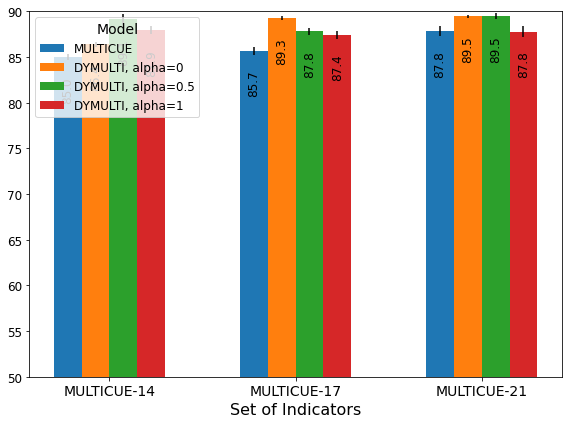

In [101]:
multi14_boundary = [0.8472, 0.8503, 0.8521, 0.8468, 0.8444, 0.8511, 0.8486, 0.85, 0.8521, 0.8561]
dymulti14_0_boundary =  [0.8619, 0.8607, 0.866, 0.8604, 0.8654, 0.8631, 0.8641, 0.8642, 0.8682, 0.8645]
dymulti14_05_boundary = [0.8876, 0.8851, 0.8991, 0.8909, 0.8856, 0.8985, 0.8883, 0.8981, 0.8836, 0.8951]
dymulti14_1_boundary = [0.8778, 0.878, 0.8852, 0.8833, 0.8804, 0.8826, 0.8744, 0.8806, 0.8699, 0.8827]

multi17_boundary = [0.8535, 0.8516, 0.8603, 0.8606, 0.857, 0.8667, 0.8602, 0.8525, 0.8528, 0.8521]
dymulti17_0_boundary = [0.8913, 0.8915, 0.8941, 0.893, 0.896, 0.8964, 0.8928, 0.8914, 0.89, 0.8888]
dymulti17_05_boundary =[0.88, 0.8728, 0.8869, 0.8789, 0.8805, 0.8798, 0.8762, 0.8788, 0.8738, 0.8742]
dymulti17_1_boundary = [0.8811, 0.8701, 0.8798, 0.8771, 0.8758, 0.8734, 0.8725, 0.8771, 0.8697, 0.8679]

multi21_boundary = [0.8736, 0.8766, 0.8825, 0.8826, 0.8726, 0.8737, 0.8827, 0.8715, 0.883, 0.8858]
dymulti21_0_boundary = [0.8951, 0.8917, 0.8921, 0.8953, 0.8917, 0.8942, 0.8944, 0.896, 0.8976, 0.8973]
dymulti21_05_boundary = [0.8929, 0.89, 0.8982, 0.8948, 0.8978, 0.8967, 0.891, 0.896, 0.8908, 0.9003]
dymulti21_1_boundary = [0.8758, 0.8793, 0.8707, 0.8809, 0.8879, 0.8817, 0.8712, 0.8762, 0.8711, 0.8845]

multi_scores = [multi14_boundary, multi17_boundary, multi21_boundary]
zero_scores = [dymulti14_0_boundary, dymulti17_0_boundary, dymulti21_0_boundary]
half_scores = [dymulti14_05_boundary, dymulti17_05_boundary, dymulti21_05_boundary]
one_scores = [dymulti14_1_boundary, dymulti17_1_boundary, dymulti21_1_boundary]
scores = np.array([multi_scores, zero_scores, half_scores, one_scores])
scores = scores * 100

plot_multicue_types(scores, "Boundary", [50,90])

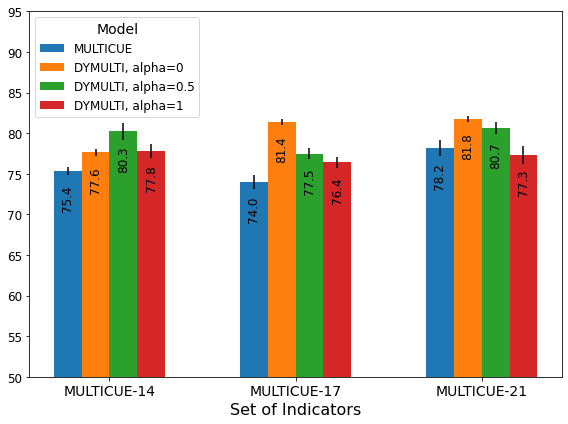

In [102]:
multi14_word = [0.7519, 0.7529, 0.7584, 0.7492, 0.7462, 0.7542, 0.7528, 0.7528, 0.7558, 0.7653]
dymulti14_0_word = [0.7753, 0.7682, 0.7801, 0.77, 0.7815, 0.7719, 0.778, 0.7764, 0.7826, 0.78]
dymulti14_05_word = [0.7976, 0.7915, 0.8161, 0.8019, 0.7898, 0.8143, 0.7963, 0.8159, 0.7897, 0.8122]
dymulti14_1_word = [0.7745, 0.7781, 0.7879, 0.7855, 0.7788, 0.781, 0.7678, 0.7826, 0.7592, 0.7855]

multi17_word = [0.7359, 0.729, 0.7458, 0.751, 0.7421, 0.7569, 0.744, 0.7325, 0.7319, 0.7303]
dymulti17_0_word = [0.8133, 0.8107, 0.8158, 0.8159, 0.8197, 0.8213, 0.8126, 0.8118, 0.8114, 0.8087]
dymulti17_05_word = [0.7762, 0.7669, 0.7902, 0.7765, 0.778, 0.7781, 0.7705, 0.7766, 0.7664, 0.7671]
dymulti17_1_word = [0.7749, 0.7578, 0.7712, 0.7708, 0.7656, 0.7627, 0.7576, 0.77, 0.7564, 0.7538]

multi21_word = [0.7737, 0.7788, 0.7895, 0.7897, 0.7713, 0.7692, 0.7908, 0.7669, 0.7893, 0.797]
dymulti21_0_word = [0.8223, 0.8123, 0.814, 0.8182, 0.813, 0.8153, 0.8162, 0.8203, 0.8222, 0.824]
dymulti21_05_word = [0.8029, 0.7968, 0.815, 0.8047, 0.8124, 0.8091, 0.7976, 0.8086, 0.7993, 0.8191]
dymulti21_1_word = [0.77, 0.7784, 0.7599, 0.7789, 0.7939, 0.7762, 0.7613, 0.7697, 0.7602, 0.7855]

multi_scores = [multi14_word, multi17_word, multi21_word]
zero_scores = [dymulti14_0_word, dymulti17_0_word, dymulti21_0_word]
half_scores = [dymulti14_05_word, dymulti17_05_word, dymulti21_05_word]
one_scores = [dymulti14_1_word, dymulti17_1_word, dymulti21_1_word]
scores = np.array([multi_scores, zero_scores, half_scores, one_scores])
scores = scores * 100

plot_multicue_types(scores, "Word", [50,95])

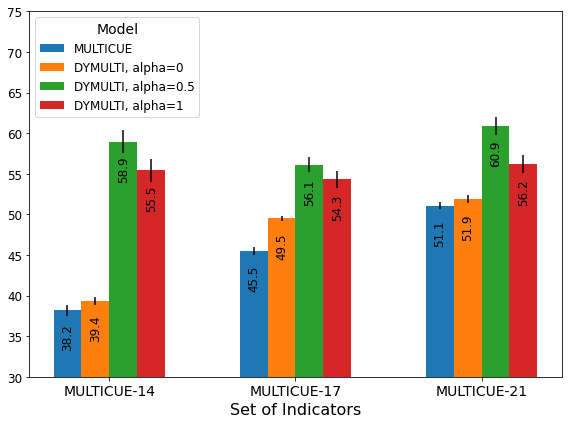

In [103]:
multi14_lex = [0.3837, 0.3858, 0.3821, 0.3737, 0.3706, 0.3845, 0.3747, 0.3851, 0.3871, 0.3945]
dymulti14_0_lex =  [0.3972, 0.3918, 0.3853, 0.3899, 0.3867, 0.399, 0.3957, 0.3965, 0.4021, 0.3912]
dymulti14_05_lex =  [0.5713, 0.5819, 0.6171, 0.5934, 0.5753, 0.5906, 0.5827, 0.6095, 0.5782, 0.5934]
dymulti14_1_lex = [0.5419, 0.5446, 0.5788, 0.5795, 0.552, 0.5553, 0.539, 0.5621, 0.5388, 0.5531]

multi17_lex = [0.4467, 0.4537, 0.4606, 0.4515, 0.4583, 0.4645, 0.4587, 0.4518, 0.453, 0.4548]
dymulti17_0_lex = [0.4933, 0.4956, 0.4954, 0.4927, 0.4975, 0.5023, 0.4958, 0.4932, 0.4914, 0.4948]
dymulti17_05_lex =[0.5594, 0.5469, 0.5753, 0.5679, 0.5685, 0.5717, 0.5582, 0.5588, 0.5459, 0.558]
dymulti17_1_lex = [0.5534, 0.5249, 0.5525, 0.5563, 0.5508, 0.5492, 0.5357, 0.5438, 0.53, 0.5365]

multi21_lex = [0.5147, 0.5042, 0.517, 0.515, 0.508, 0.5116, 0.5044, 0.5134, 0.5072, 0.5119]
dymulti21_0_lex = [0.5234, 0.5159, 0.5208, 0.5202, 0.5092, 0.5237, 0.5126, 0.5211, 0.5167, 0.5242]
dymulti21_05_lex = [0.6009, 0.5967, 0.6335, 0.61, 0.6113, 0.6102, 0.591, 0.6162, 0.6031, 0.617]
dymulti21_1_lex = [0.5541, 0.5644, 0.554, 0.5839, 0.5674, 0.563, 0.5436, 0.5658, 0.5506, 0.5699]

multi_scores = [multi14_lex, multi17_lex, multi21_lex]
zero_scores = [dymulti14_0_lex, dymulti17_0_lex, dymulti21_0_lex]
half_scores = [dymulti14_05_lex, dymulti17_05_lex, dymulti21_05_lex]
one_scores = [dymulti14_1_lex, dymulti17_1_lex, dymulti21_1_lex]
scores = np.array([multi_scores, zero_scores, half_scores, one_scores])
scores = scores * 100

plot_multicue_types(scores, "Lexicon", [30,75])

## Plotting Learning Rates

In [9]:
from wordseg import evaluate, utils

import codecs

In [10]:
measures = ["token_precision", "token_recall", "token_fscore", "type_precision", "type_recall", "type_fscore", "boundary_noedge_precision", "boundary_noedge_recall", "boundary_noedge_fscore", "oversegmentation", "undersegmentation"]

In [16]:
def get_boundaries(utt, prepared_utt):
    # prepared_utt is space-separated phonemes (e.g 'ab c d e')
    # utt is segmented utterance (e.g. 'abc de')
    # does not return utterance boundaries
    boundaries = []
    phones = prepared_utt.strip().split(' ')
    n = len(utt)
    i = 0
    for phone in phones:
        i += len(phone)
        if i >= n:
            break
        if utt[i] == ' ':
            boundaries.append(True)
            i += 1
        else:
            boundaries.append(False)
    return boundaries

def get_overundersegmentations(text, gold, prepared):
    """ Calculates undersegmentation and oversegmentation """
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for (text_utt, gold_utt, prepared_utt) in zip(text, gold, prepared):
        text_boundaries = get_boundaries(text_utt, prepared_utt)
        gold_boundaries = get_boundaries(gold_utt, prepared_utt)
        for i, b in enumerate(text_boundaries):
            if b and gold_boundaries[i]:
                tp += 1
            if b and not gold_boundaries[i]:
                fp += 1
            if not b and gold_boundaries[i]:
                fn += 1
            if not b and not gold_boundaries[i]:
                tn += 1
    overseg = fp / (fp + tn) if (fp + tn) != 0 else 0
    underseg = fn / (fn + tp) if (fn + tp) != 0 else 0
    return (overseg, underseg)

In [21]:
def get_learning_rate(foldername, interval=200):
    # Get data
    l = len(evaluate._load_text(codecs.open(foldername+"/gold.txt", 'r', encoding='utf8')))
    scores = {}
    deviations = {}
    for measure in measures:
        scores[measure] = []
        deviations[measure] = []
    indices = [i for i in range(0, l, interval)]
    for i in indices:
        results = {}
        for measure in measures:
            results[measure] = []
        j = l if (l - i < interval) else i+interval
        for n in range(1,11):
            gold = evaluate._load_text(codecs.open(foldername+"/gold{}.txt".format(n), 'r', encoding='utf8'))
            text = evaluate._load_text(codecs.open(foldername+"/segmented{}.txt".format(n), 'r', encoding='utf8'))
            prepared = evaluate._load_text(codecs.open(foldername+"/prepared{}.txt".format(n), 'r', encoding='utf8'))
            evals = evaluate.evaluate(text[i:j], gold[i:j])
            evals["oversegmentation"], evals["undersegmentation"] = get_overundersegmentations(text[i:j], gold[i:j], prepared[i:j])
            for measure in measures:
                results[measure].append(evals[measure])
        for measure in measures:
            scores[measure].append(100*np.mean(results[measure]))
            deviations[measure].append(100*np.std(results[measure]))
        # print(results["token_fscore"])

    for measure in measures:
        scores[measure] = np.array(scores[measure])
        deviations[measure] = np.array(deviations[measure])

    return scores, deviations, indices

In [22]:
avg_a, dev_a, x = get_learning_rate("../experiments/A")

In [39]:
avg_b, dev_b, _ = get_learning_rate("../experiments/B")

In [31]:
avg_c, dev_c, _ = get_learning_rate("../experiments/C")

In [32]:
avg_d, dev_d, _ = get_learning_rate("../experiments/D")

In [72]:
avg_e, dev_e, _ = get_learning_rate("../experiments/E")

In [34]:
avg_f, dev_f, _ = get_learning_rate("../experiments/F")

In [35]:
avg_g, dev_g, _ = get_learning_rate("../experiments/G")

In [36]:
avg_h, dev_h, _ = get_learning_rate("../experiments/H")

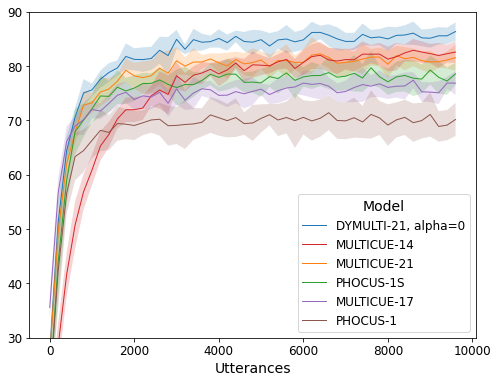

In [76]:
measure = "token_fscore"

# Set up graph
fig, ax = plt.subplots(figsize=(8, 6))

l_dm21, = ax.plot(x, avg_e[measure], linewidth=1.0)
ax.fill_between(x, avg_e[measure] - dev_e[measure], avg_e[measure] + dev_e[measure], alpha=0.2)

l_mc21, = ax.plot(x, avg_d[measure], linewidth=1.0)
ax.fill_between(x, avg_d[measure] - dev_d[measure], avg_d[measure] + dev_d[measure], alpha=0.2)

l_p1s, = ax.plot(x, avg_b[measure], linewidth=1.0)
ax.fill_between(x, avg_b[measure] - dev_b[measure], avg_b[measure] + dev_b[measure], alpha=0.2)

l_mc14, = ax.plot(x, avg_h[measure], linewidth=1.0)
ax.fill_between(x, avg_h[measure] - dev_h[measure], avg_h[measure] + dev_h[measure], alpha=0.2)

l_mc17, = ax.plot(x, avg_a[measure], linewidth=1.0)
ax.fill_between(x, avg_a[measure] - dev_a[measure], avg_a[measure] + dev_a[measure], alpha=0.2)

l_p1, = ax.plot(x, avg_g[measure], linewidth=1.0)
ax.fill_between(x, avg_g[measure] - dev_g[measure], avg_g[measure] + dev_g[measure], alpha=0.2)

# ax.plot(x, avg_c[measure], label="DYMULTI-21, alpha=0.5", linewidth=1.0)
# ax.fill_between(x, avg_c[measure] - dev_c[measure], avg_c[measure] + dev_c[measure], alpha=0.2)

# ax.plot(x, avg_f[measure], label="DYMULTI-21, alpha=1", linewidth=1.0)
# ax.fill_between(x, avg_f[measure] - dev_f[measure], avg_f[measure] + dev_f[measure], alpha=0.2)

# Display settings
ax.set_xlabel("Utterances", fontsize=14)
#ax.set_ylabel("Error rate", fontsize=14)
ax.set_ylim([30,90])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Legend
lines = [l_dm21, l_mc14, l_mc21, l_p1s, l_mc17, l_p1]
labels = ["DYMULTI-21, alpha=0", "MULTICUE-14", "MULTICUE-21", "PHOCUS-1S", "MULTICUE-17", "PHOCUS-1"]
ax.legend(lines, labels, title="Model", loc='lower right', title_fontsize=14, fontsize=12)

plt.show()


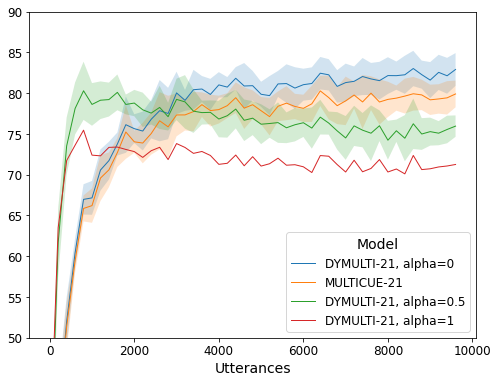

In [83]:
measure = "type_fscore"

# Set up graph
fig, ax = plt.subplots(figsize=(8, 6))

l_dm21a0, = ax.plot(x, avg_e[measure], linewidth=1.0)
ax.fill_between(x, avg_e[measure] - dev_e[measure], avg_e[measure] + dev_e[measure], alpha=0.2)

l_mc21, = ax.plot(x, avg_d[measure], linewidth=1.0)
ax.fill_between(x, avg_d[measure] - dev_d[measure], avg_d[measure] + dev_d[measure], alpha=0.2)

l_dm21a05, = ax.plot(x, avg_c[measure], linewidth=1.0)
ax.fill_between(x, avg_c[measure] - dev_c[measure], avg_c[measure] + dev_c[measure], alpha=0.2)

l_dm21a1, = ax.plot(x, avg_f[measure], linewidth=1.0)
# ax.fill_between(x, avg_f[measure] - dev_f[measure], avg_f[measure] + dev_f[measure], alpha=0.2)

# Display settings
ax.set_xlabel("Utterances", fontsize=14)
#ax.set_ylabel("Error rate", fontsize=14)
ax.set_ylim([50,90])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Legend
lines = [l_dm21a0, l_mc21, l_dm21a05, l_dm21a1]
labels = ["DYMULTI-21, alpha=0", "MULTICUE-21", "DYMULTI-21, alpha=0.5", "DYMULTI-21, alpha=1"]
ax.legend(lines, labels, title="Model", loc='lower right', title_fontsize=14, fontsize=12)

plt.show()


In [34]:
def get_averages(foldername, measure):
    # Get data
    l = len(evaluate._load_text(codecs.open(foldername+"/gold.txt", 'r', encoding='utf8')))
    scores = []
    for n in range(1,11):
        gold = evaluate._load_text(codecs.open(foldername+"/gold{}.txt".format(n), 'r', encoding='utf8'))
        text = evaluate._load_text(codecs.open(foldername+"/segmented{}.txt".format(n), 'r', encoding='utf8'))
        scores.append(evaluate.evaluate(text, gold)[measure])
    return scores

## Cross-lingual evaluation

In [29]:
def plot_languages(word_scores, lexicon_scores, languages):
    x = np.arange(len(languages))  # the label locations
    width = 0.30  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects = []
    rects.append(ax.bar(x - width/2, np.mean(word_scores, axis=1), width, yerr=np.std(word_scores,axis=1), label="WF"))
    rects.append(ax.bar(x + width/2, np.mean(lexicon_scores, axis=1), width, yerr=np.std(lexicon_scores,axis=1), label="LF"))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax.set_ylabel('F1 scores')
    #ax.set_title('{} F1 scores by model and weight type'.format(score_type))
    ax.set_xticks(x)
    ax.set_xticklabels(languages, rotation=90)
    #ax.set_ylim([np.floor(np.min(weight_scores)/10)*10,np.floor(np.min(weight_scores)/10)*10+30])
    ax.legend(title="Score", loc="upper left")

    #for i in range(2):
    #    addlabels(rects[i], np.mean(weight_scores[i], axis=1), ax)

    fig.tight_layout()

def plot_three(phocus_scores, multi_scores, dymulti_scores, languages):
    x = np.arange(len(languages))  # the label locations
    width = 0.20  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects = []
    rects.append(ax.bar(x - width, np.mean(phocus_scores, axis=1), width, yerr=np.std(phocus_scores,axis=1), label="PHOCUS-1S"))
    rects.append(ax.bar(x, np.mean(multi_scores, axis=1), width, yerr=np.std(multi_scores,axis=1), label="MULTICUE-17"))
    rects.append(ax.bar(x + width, np.mean(dymulti_scores, axis=1), width, yerr=np.std(dymulti_scores,axis=1), label="DYMULTI-21"))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax.set_title('{} F1 scores by model and weight type'.format(score_type))
    ax.set_xticks(x)
    ax.set_xticklabels(languages, rotation=90)

    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    #ax.set_ylim([np.floor(np.min(weight_scores)/10)*10,np.floor(np.min(weight_scores)/10)*10+30])
    ax.legend(title="Model", loc="upper right", fontsize=12, title_fontsize=14)
    
    fig.tight_layout()

def plot_three_singles(phocus_scores, multi_scores, dymulti_scores, languages):
    x = np.arange(len(languages))  # the label locations
    width = 0.20  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects = []
    rects.append(ax.bar(x - width, phocus_scores, width, label="PHOCUS-1S"))
    rects.append(ax.bar(x, multi_scores, width, label="MULTICUE-17"))
    rects.append(ax.bar(x + width, dymulti_scores, width, label="DYMULTI-21"))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax.set_title('{} F1 scores by model and weight type'.format(score_type))
    ax.set_xticks(x)
    ax.set_xticklabels(languages, rotation=90)
    #ax.set_ylim([np.floor(np.min(weight_scores)/10)*10,np.floor(np.min(weight_scores)/10)*10+30])
    ax.legend(title="Model", loc="upper left")

    fig.tight_layout()

In [18]:
def get_scores(foldername, remove_start=0):
    # Get data
    scores = {}
    deviations = {}
    for measure in measures:
        scores[measure] = []
        deviations[measure] = []
    results = {}
    for measure in measures:
        results[measure] = []
    for n in range(1,11):
        gold = evaluate._load_text(codecs.open(foldername+"/gold{}.txt".format(n), 'r', encoding='utf8'))
        text = evaluate._load_text(codecs.open(foldername+"/segmented{}.txt".format(n), 'r', encoding='utf8'))
        prepared = evaluate._load_text(codecs.open(foldername+"/prepared{}.txt".format(n), 'r', encoding='utf8'))
        evals = evaluate.evaluate(text[remove_start:], gold[remove_start:])
        evals["oversegmentation"], evals["undersegmentation"] = get_overundersegmentations(text[remove_start:], gold[remove_start:], prepared[remove_start:])
        for measure in measures:
            results[measure].append(100 * evals[measure])

    return results

def get_og_score(foldername, remove_start=0):
    # Get data
    gold = evaluate._load_text(codecs.open(foldername+"/gold0.txt", 'r', encoding='utf8'))
    text = evaluate._load_text(codecs.open(foldername+"/segmented0.txt", 'r', encoding='utf8'))
    prepared = evaluate._load_text(codecs.open(foldername+"/prepared0.txt", 'r', encoding='utf8'))
    evals = evaluate.evaluate(text[remove_start:], gold[remove_start:])
    evals["oversegmentation"], evals["undersegmentation"] = get_overundersegmentations(text[remove_start:], gold[remove_start:], prepared[remove_start:])

    return evals

In [19]:
import os
folders = ["../experiments/" + folder for folder in os.listdir("../experiments/") if "L-" in folder]
folders.sort()
languages = list(set(map(lambda x : x.split('-')[1], folders)))
languages.sort()

def get_score_arrays(folders, remove_start):
    word_scores = []
    lexicon_scores = []
    for folder in folders:
        scores = get_scores(folder, remove_start)
        word_scores.append(scores["token_fscore"])
        lexicon_scores.append(scores["type_fscore"])
    return np.array(word_scores), np.array(lexicon_scores)

def get_og_score_list(folders, remove_start):
    word_scores = []
    lexicon_scores = []
    for folder in folders:
        scores = get_og_score(folder, remove_start)
        word_scores.append(scores["token_fscore"])
        lexicon_scores.append(scores["type_fscore"])
    return 100 * np.array(word_scores), 100 * np.array(lexicon_scores)

In [20]:
multicue_word_scores, multicue_lexicon_scores = get_score_arrays([folder for folder in folders if folder[-1] == "M"], 5000)
phocus_word_scores, phocus_lexicon_scores = get_score_arrays([folder for folder in folders if folder[-1] == "P"], 5000)
dymulti_word_scores, dymulti_lexicon_scores = get_score_arrays([folder for folder in folders if folder[-1] == "D"], 5000)

In [78]:
multicue_word_scores_og, multicue_lexicon_scores_og = get_og_score_list([folder for folder in folders if folder[-1] == "M"], 5000)
phocus_word_scores_og, phocus_lexicon_scores_og = get_og_score_list([folder for folder in folders if folder[-1] == "P"], 5000)
dymulti_word_scores_og, dymulti_lexicon_scores_og = get_og_score_list([folder for folder in folders if folder[-1] == "D"], 5000)

In [11]:
plot_languages(word_scores, lexicon_scores, languages)

NameError: name 'word_scores' is not defined

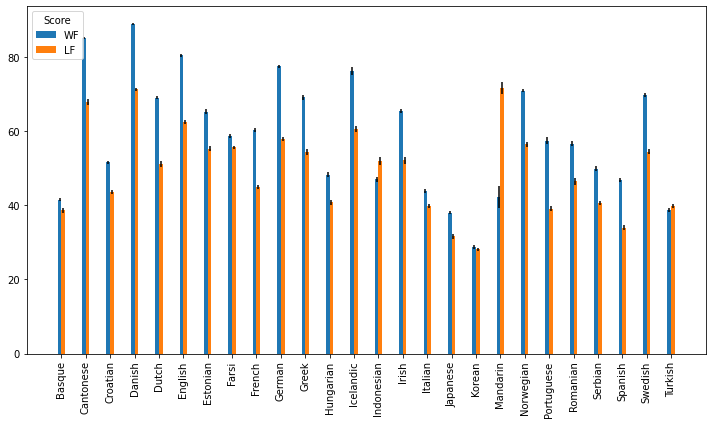

In [42]:
plot_languages(word_scores, lexicon_scores, languages)

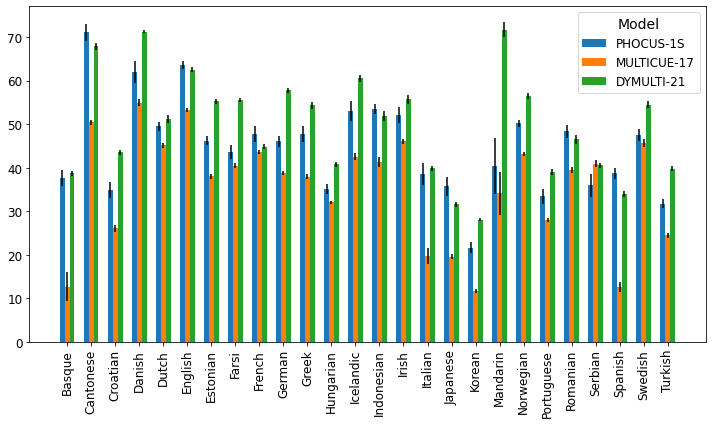

In [30]:
plot_three(phocus_lexicon_scores, multicue_lexicon_scores, dymulti_lexicon_scores, languages)

In [36]:
count = 0
for i in range(len(languages)):
    _, p1 = ttest_rel(phocus_lexicon_scores[i], dymulti_lexicon_scores[i])
    _, p2 = ttest_rel(multicue_lexicon_scores[i], dymulti_lexicon_scores[i])
    if (p1 < 0.01 and np.mean(phocus_lexicon_scores[i]) < np.mean(dymulti_lexicon_scores[i])
        and p2 < 0.01 and np.mean(multicue_lexicon_scores[i]) < np.mean(dymulti_lexicon_scores[i])):
        count += 1
count

15

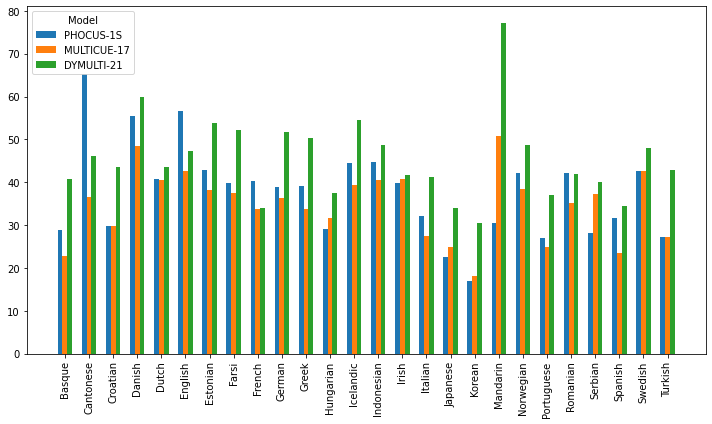

In [77]:
plot_three_singles(phocus_lexicon_scores_og, multicue_lexicon_scores_og, dymulti_lexicon_scores_og, languages)

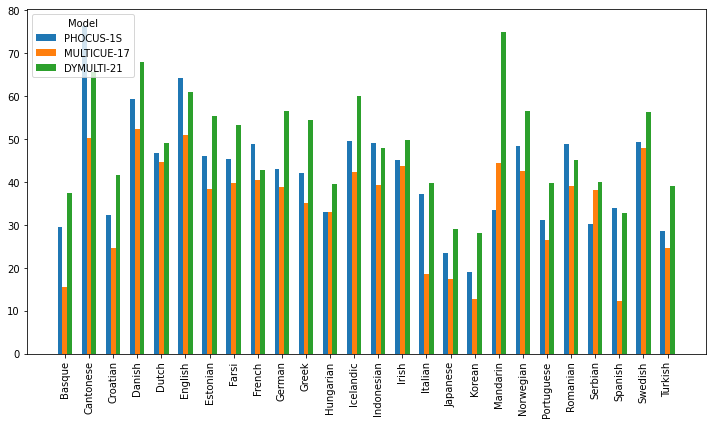

In [79]:
plot_three_singles(phocus_lexicon_scores_og, multicue_lexicon_scores_og, dymulti_lexicon_scores_og, languages)

## Transitional Probability Examples

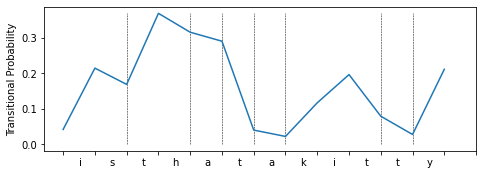

In [43]:
import matplotlib.transforms

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])

#fig, ax = plt.subplots(figsize=(8, 6))

x = list(' isthatakitty ')
tps = [0.04157303370786517, 0.2140036851803106, 0.1682486022623846, 0.36802721088435375, 0.31495062090544634, 0.28971102521627096, 0.03983371126228269, 0.02199521443033315, 0.11653872993719469, 0.19584101079231378, 0.07883597883597884, 0.027513227513227514, 0.2108118581670219]

ax.plot(list(range(len(tps))), tps)

for i in range(1, len(tps)-1):
    if tps[i] < tps[i-1]:# and tps[i] < tps[i+1]:
        plt.vlines(x = i, ymin = 0, ymax = np.max(tps), colors = 'black', linestyles="dashed", linewidth=0.5) 

ax.set_xticks(list(range(len(tps)+1)))
ax.set_xticklabels(x)

# ax.plot(x, avg_c[measure], label="DYMULTI-21, alpha=0.5", linewidth=1.0)
# ax.fill_between(x, avg_c[measure] - dev_c[measure], avg_c[measure] + dev_c[measure], alpha=0.2)

# ax.plot(x, avg_f[measure], label="DYMULTI-21, alpha=1", linewidth=1.0)
# ax.fill_between(x, avg_f[measure] - dev_f[measure], avg_f[measure] + dev_f[measure], alpha=0.2)

# Plot data
ax.set_ylabel("Transitional Probability")
#ax.set_ylim([50,100])
#ax.legend()

dx = -0.2; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)



for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.show()


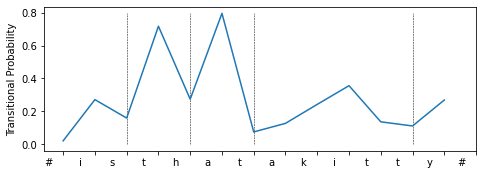

In [6]:
import matplotlib.transforms

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])

#fig, ax = plt.subplots(figsize=(8, 6))

x = list('#isthatakitty#')
tps = [0.020786516853932586, 0.2714987714987715, 0.15928659286592867, 0.7179289026275116, 0.27418361059765867, 0.7963365414467557, 0.07496823379923762, 0.127134724857685, 0.24267782426778242, 0.3562874251497006, 0.1364247311827957, 0.1112176414189837, 0.2692307692307692]

ax.plot(list(range(len(tps))), tps)

for i in range(1, len(tps)-1):
    if tps[i] < tps[i-1] and tps[i] < tps[i+1]:
        plt.vlines(x = i, ymin = 0, ymax = np.max(tps), colors = 'black', linestyles="dashed", linewidth=0.5) 

ax.set_xticks(list(range(len(tps)+1)))
ax.set_xticklabels(x)

# ax.plot(x, avg_c[measure], label="DYMULTI-21, alpha=0.5", linewidth=1.0)
# ax.fill_between(x, avg_c[measure] - dev_c[measure], avg_c[measure] + dev_c[measure], alpha=0.2)

# ax.plot(x, avg_f[measure], label="DYMULTI-21, alpha=1", linewidth=1.0)
# ax.fill_between(x, avg_f[measure] - dev_f[measure], avg_f[measure] + dev_f[measure], alpha=0.2)

# Plot data
ax.set_ylabel("Transitional Probability")
#ax.set_ylim([50,100])
#ax.legend()

dx = -0.2; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)



for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.show()

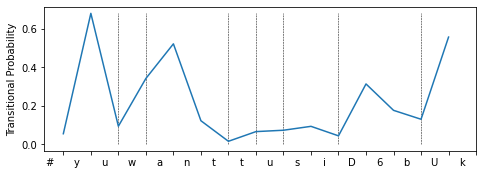

In [14]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])

x = list('#yuwanttusiD6bUk')
tps = [0.05466334164588529, 0.679521789433089, 0.0935604966791799, 0.34151193633952254, 0.5212694125590817, 0.12207896857373086, 0.015365703749231715, 0.06564228641671789, 0.0727692751949177, 0.09301290609701825, 0.04369890047927826, 0.31304558680892336, 0.1760601180891036, 0.12977498691784406, 0.5563114134542706]

ax.plot(list(range(len(tps))), tps)

for i in range(1, len(tps)-1):
    #if tps[i] < tps[i-1] and tps[i] < tps[i+1]:
    #    plt.vlines(x = i, ymin = 0, ymax = np.max(tps), colors = 'black', linestyles="dashed", linewidth=0.5) 
    #if tps[i] < tps[i-1]:
    #    plt.vlines(x = i, ymin = 0, ymax = np.max(tps), colors = 'black', linestyles="dashed", linewidth=0.5) 
    if tps[i] < tps[i+1]:
        plt.vlines(x = i, ymin = 0, ymax = np.max(tps), colors = 'black', linestyles="dashed", linewidth=0.5) 


ax.set_xticks(list(range(len(tps)+1)))
ax.set_xticklabels(x)

# ax.plot(x, avg_c[measure], label="DYMULTI-21, alpha=0.5", linewidth=1.0)
# ax.fill_between(x, avg_c[measure] - dev_c[measure], avg_c[measure] + dev_c[measure], alpha=0.2)

# ax.plot(x, avg_f[measure], label="DYMULTI-21, alpha=1", linewidth=1.0)
# ax.fill_between(x, avg_f[measure] - dev_f[measure], avg_f[measure] + dev_f[measure], alpha=0.2)

# Plot data
ax.set_ylabel("Transitional Probability")
#ax.set_ylim([50,100])
#ax.legend()

dx = -0.2; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.show()